# Combined Cycle Power Plant - Linear Regression

<img src='dsflow.png'>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Collection & Data Exploration

In [3]:
#load data
df = pd.read_excel(r"E:\MLIoT\ML\dataset\CCPP (1)\CCPP\Folds5x2_pp.xlsx")

In [4]:
df.shape

(9568, 5)

In [5]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [7]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## 3. Data Cleaning

In [8]:
# check for missing values
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [9]:
# check for duplicated rows
df.duplicated().sum()

41

In [10]:
# drop the duplicated rows
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(9568, 5)
(9527, 5)


In [11]:
# check for outliers
df.skew()

AT   -0.136107
V     0.196819
AP    0.273846
RH   -0.435138
PE    0.305791
dtype: float64

# 4. Feature Engineering
## Feature Selection
### Data Visualization - Bivariate Analysis
    - numeric vs numeric - scatterplot

In [12]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

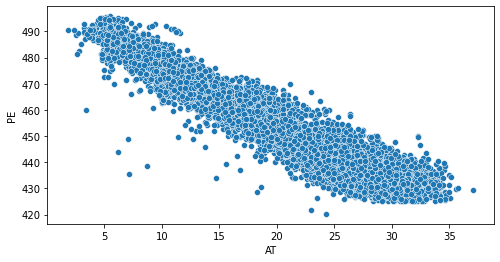

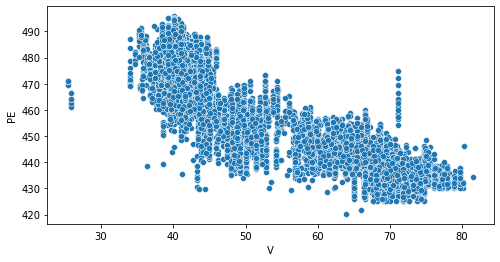

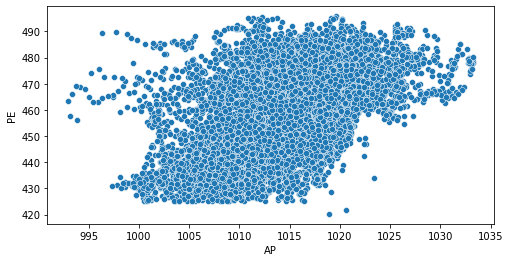

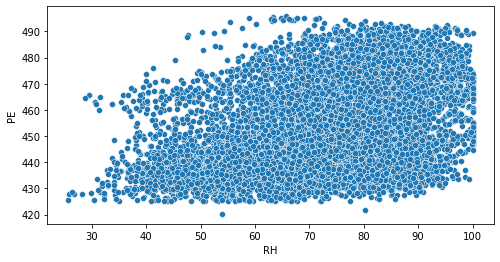

In [13]:
nums = ['AT', 'V', 'AP', 'RH']
for col in nums:
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=col,y='PE',data=df)
    plt.show()

### Statistical Research
#### Correlation Analysis

    - if corr(x,y) > +0.5  OR corr(x,y) < -0.5  === Very good correlation
    - if corr(x,y) is between +0.1 to +0.5 == slightly good correlation
    - if corr(x,y) is between -0.1 to -0.5 == slightly good correlation
    - if corr(x,y) is between -0.1 to +0.1 == bad correlation

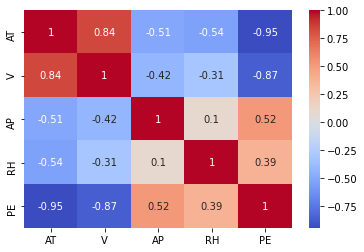

In [15]:
cor = df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()